In [10]:
import pandas as pd
import numpy as np

In [20]:
d = {"Actor 01": ["A","B","C","M","E","F","G","L","I","J"],"Actor 02": ["B","K","D","E","F","G","H","I","J","A"],
     "Actor 03": ["C","D","E","F","M","H","L","J","A","B"],"Actor 04": ["D","E","K","G","H","I","J","A","B","C"],
     "Actor 05": ["E","F","G","H","I","J","A","B","C","D"],"Actor 06": ["F","M","H","I","K","A","B","C","D","E"],
     "Actor 07": ["G","H","I","J","A","B","C","D","E","F"],"Actor 08": ["H","I","L","A","B","C","D","E","F","G"],
     "Actor 09": ["I","J","A","B","C","D","M","F","G","L"],"Actor 10": ["J","A","B","C","D","E","F","K","H","I"]}
df = pd.DataFrame(data=d)
rows,columns = df.shape


'actor_weights = {}\nfor x in df[["Actor 1","Actor 2","Actor 3","Actor 4","Actor 5","Actor 6","Actor 7","Actor 8","Actor 9","Actor 10"]]:\n    actors = [df[x][j] for j in range(10)]\n    for i in range(len(actors)-1):\n        edge = actors[i] + " to " + actors[i+1]\n        if edge not in actor_weights:\n            actor_weights[edge] = 1\n        else:\n            actor_weights[edge] += 1\nprint(actor_weights)'

[['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
 ['B' 'K' 'D' 'E' 'F' 'M' 'H' 'I' 'J' 'A']
 ['C' 'D' 'E' 'K' 'G' 'H' 'I' 'L' 'A' 'B']
 ['M' 'E' 'F' 'G' 'H' 'I' 'J' 'A' 'B' 'C']
 ['E' 'F' 'M' 'H' 'I' 'K' 'A' 'B' 'C' 'D']
 ['F' 'G' 'H' 'I' 'J' 'A' 'B' 'C' 'D' 'E']
 ['G' 'H' 'L' 'J' 'A' 'B' 'C' 'D' 'M' 'F']
 ['L' 'I' 'J' 'A' 'B' 'C' 'D' 'E' 'F' 'K']
 ['I' 'J' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H']
 ['J' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'L' 'I']]
[('A', 'B'), ('A', 'J'), ('A', 'L'), ('A', 'K'), ('B', 'C'), ('B', 'K'), ('C', 'D'), ('C', 'M'), ('D', 'E'), ('D', 'K'), ('D', 'M'), ('E', 'F'), ('E', 'K'), ('E', 'M'), ('F', 'G'), ('F', 'M'), ('F', 'K'), ('G', 'H'), ('G', 'K'), ('G', 'L'), ('H', 'I'), ('H', 'M'), ('H', 'L'), ('I', 'J'), ('I', 'L'), ('I', 'K'), ('J', 'L'), ('K', 'L')]
{'weight': 10}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 9}
{'weight': 1}
{'weight': 8}
{'weight': 1}
{'weight': 8}
{'weight': 1}
{'weight': 1}
{'weight': 8}
{'weight': 1}
{'weight': 1}
{'weight': 6}
{'weight': 1}
{'weigh

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

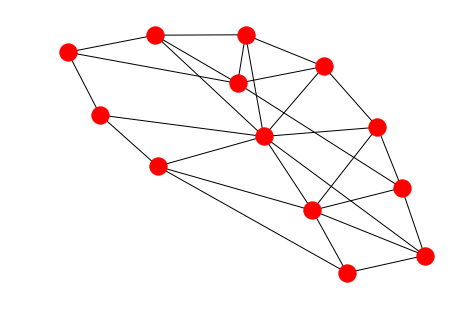

In [47]:
import networkx as nx
nx_graph = nx.Graph()

actors = df.as_matrix(columns=["Actor 01","Actor 02","Actor 03","Actor 04","Actor 05","Actor 06","Actor 07","Actor 08","Actor 09","Actor 10"])

print(actors)

for i in range(len(actors)):
    actors_in_movie = actors[i,:]
    for j in range(len(actors_in_movie)):
        if j == 9:
            if (actors_in_movie[j],actors_in_movie[0]) not in nx_graph.edges():
                nx_graph.add_edge(actors_in_movie[j],actors_in_movie[0],weight=1)
            else:
                nx_graph.add_edge(actors_in_movie[j],actors_in_movie[0],weight=nx_graph.get_edge_data(actors_in_movie[j],actors_in_movie[0])['weight']+1)
        else:
            if (actors_in_movie[j],actors_in_movie[j+1]) not in nx_graph.edges():
                nx_graph.add_edge(actors_in_movie[j],actors_in_movie[j+1],weight=1)
            else:
                nx_graph.add_edge(actors_in_movie[j],actors_in_movie[j+1],weight=nx_graph.get_edge_data(actors_in_movie[j],actors_in_movie[j+1])['weight']+1)
        
print(nx_graph.edges())
for edge in nx_graph.edges():    
    print(nx_graph.get_edge_data(edge[0],edge[1]))

from matplotlib import pyplot as plt
nx.draw(nx_graph)
plt.show()



In [36]:
nx_graph1 = nx.Graph()
nx_graph1.add_node('A')
nx_graph1.add_node('B')
nx_graph1.add_edge('A', 'B')
nx_graph1.add_edge('A', 'C') # Node 'C' is added to the graph
nx_graph1.add_edges_from([('A', 'D'), ('A', 'E'), ('B', 'C')])

nx_graph1.add_edge('C', 'D', weight=0.5)


print(nx_graph1.get_edge_data('C', 'D'))

nx_graph1.add_edge('C', 'D', weight=nx_graph1.get_edge_data('C','D')['weight']+1)
print(nx_graph1.get_edge_data('C', 'D'))

print(nx_graph1.edges())

if ('B','A') not in nx_graph1.edges():
    nx_graph1.add_edge('B','A')
    
print(nx_graph1.edges())



#print(nx_graph.nodes())
#print(nx_graph.edges())

"""from matplotlib import pyplot as plt
nx.draw(nx_graph)
plt.show()"""


{'weight': 0.5}
{'weight': 1.5}
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('C', 'D')]
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('C', 'D')]


'from matplotlib import pyplot as plt\nnx.draw(nx_graph)\nplt.show()'